In [103]:
# Oletetaan, että meillä on kolmen trigonometrisen funktion 
# 4sin(6t), 3sin(15t) ja 5cos(20t) summana muodostuva signaali 
# jota näytteistetään kymmenen hertsin taajuudella (0.1s välein). 
# Pythonilla voidaan aika ja signaali tällöin määritellä seuraavasti:
#     t = np.arange(0,100,0.1)
#     f = 4*np.sin(6*t) + 3*np.sin(15*t) + 5*np.cos(20*t)

#  a) Piirrä signaalin kuvaaja, voisitko sen perusteella arvata, miten signaali on muodostettu? Muuta akseleita (zoomaa) tarvitaessa




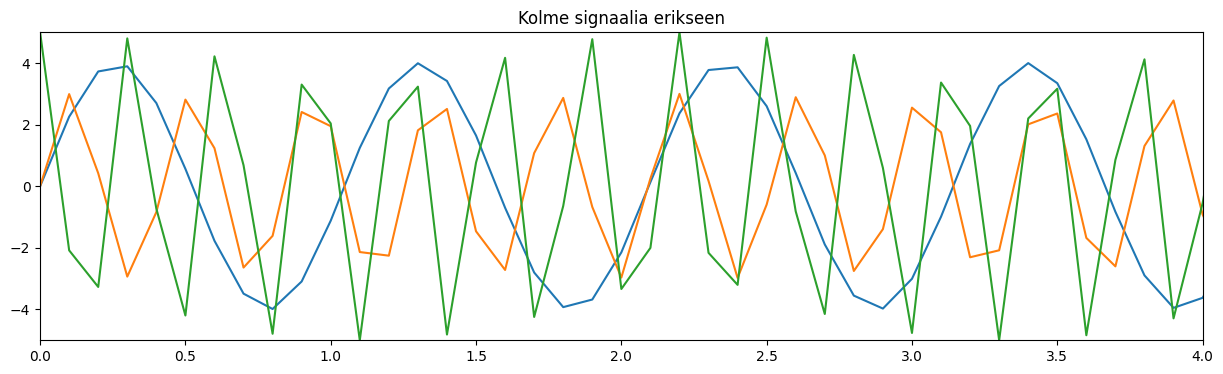

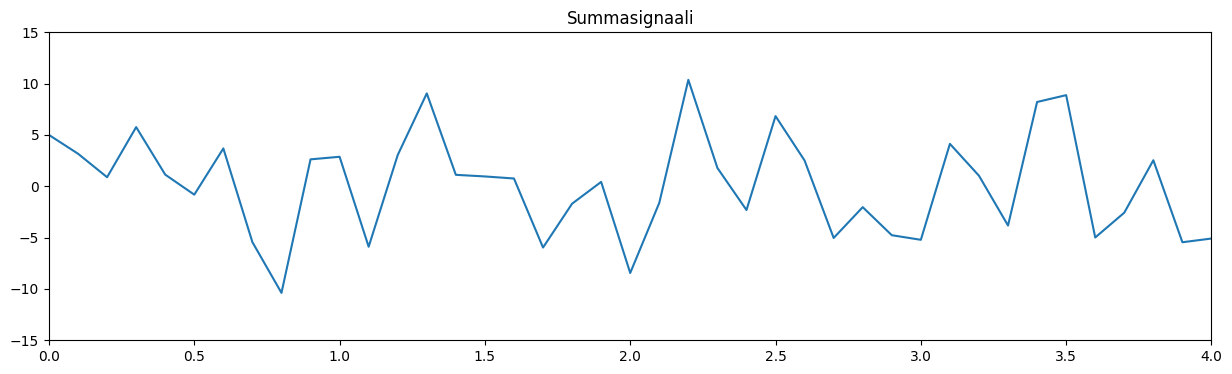

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dt = 0.1
t = np.arange(0,100,dt) #Ajan arvot lähtien nollasta, päättyen sataan, 0.1s välein.
#Tämä tarkoittaa näytteistystä 0.1s välein, eli pisteiden väli on aina 0.1s

#Signaali muodostuu:
#f = 4*np.sin(6*t) + 3*np.sin(15*t) + 5*np.cos(20*t)

#Tutkitaan ensin kolmea signaalia f1,f2 ja f3
f1 = 4*np.sin(6*t)
f2 = 3*np.sin(15*t)
f3 = 5*np.cos(20*t)
#Tällöin lopullinen signaali olisi
f = f1 + f2 + f3

#Piirretään signaalien f1, f2 ja f3 kuvaajat:
plt.figure(figsize=(15,4))
plt.plot(t,f1)
plt.plot(t,f2)
plt.plot(t,f3)
plt.axis([0,4,-5,5])#Zoomataan vähän
#Nähdään selvästi, että kyseessä on kolme jaksollista signaalia. 
plt.title('Kolme signaalia erikseen')
plt.show()

#Piirretään summasignaali f kuvaaja
plt.figure(figsize=(15,4))
plt.plot(t,f)
plt.axis([0,4,-15,15])#Zoomataan vähän
#Nähdään selvästi, että kyseessä on kolme jaksollista signaalia. 
plt.title('Summasignaali')
plt.show()

In [105]:
#Summasignaali f ei silmämääräisesti näytä jaksolliselta
#Oikeastaan se näyttää aika satunnaiselta...

#Olettavasti summasignaali f on jaksollinen, koska f1, f2 ja f3 ovat

#Fourier-analyysin peruslause:
#"Mikä tahansa jaksollinen signaali/funktio voidaan esittää sini- ja kosifunktioden summana"

#Eli käytännössä, voidaan selvittää, mistä tässä tapauksessa ovat alkuperäiset funktiot/signaalit f1, f2 ja f3 
#(tai mitkä tahansa sini- ja kosifunktiot), jotka muodostovat signaalin f

In [106]:
#Tämä toteutetaan Fourier-analyysillä

#  b) Laske signaalin Fourier-muunnos FFT-algoritmilla 
N = len(f) #Datapisteiden määrä
fourier = np.fft.fft(f,N) #Fourier-muunnos, sisältä täydellisen informaation signaalista f
#Fourier-muunnos kuvaa signaalia f taajuusaravuudessa (signaali f on aika-avaruudessa)
#Käytännössä fourier on tietorakenne, jossa jokaiselle rivillä on kaksi kompleksilukua
#Fourier kertoo, millaisista sini- ja kosifunktiosta(signaaleista) signaali f rakentuu

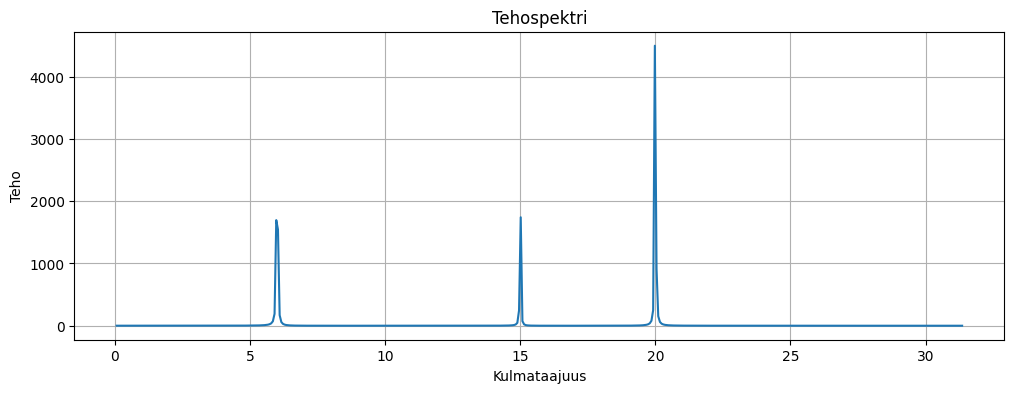

In [107]:

#Signaalin tehospektri kerto, kuinka suuri on mikäkin signaalissa esiintyvän taajuuden teho
#dt = 0.1, eli signaali on näytteistetty 0.1s välein
#  c) Laske signaalin tehospektri
psd = fourier*np.conj(fourier)/N #Power spectral density. Jakaminen N:llä, koska muuten datapisteiden määrän
#kasvu kasvattaisi psd:n arvoja
freq = np.fft.fftfreq(N,dt) #Signaalissa mahdollisesti esiityvät taajuudet
#plt.plot(freq,psd)
#Rajataan pois n. negatiiviset taajuudet
L = np.arange(1,np.floor(N/2),dtype = 'int')
#Valitaan haluttu osa tehospektriä
PSD = np.array([freq[L],psd[L].real])

#Muistetaan taajuuden ja kulmataajuden välinen yhteys: omega = 2*pi*f
plt.figure(figsize=(12,4))
plt.plot(PSD[0,:]*2*np.pi,PSD[1,:]) #Teho taajuuden funktiona
plt.grid()
plt.ylabel('Teho')
plt.xlabel('Kulmataajuus')
plt.title('Tehospektri')
plt.show()


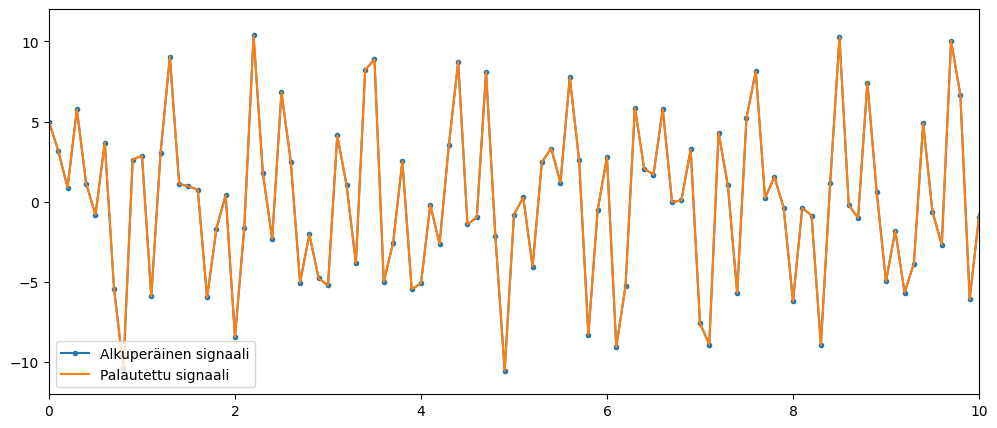

In [108]:
#  d) Tarkastele tehospektriä, mitkä ovat dominoivat taajuudet? 
# #Miten ne vastaavat alunperin määriteltyä signaalia?
#Kulmataajuudet 6, 15 ja 20 ovat alkuperäisten signaalien kulmataajuudet

#  e) Laske Fourier-muunnoksen käänteismuunnos ja varmista, että saat sen tuloksena alkuperäisen signaalin. 
f_i = np.fft.ifft(fourier,N) 
plt.figure(figsize=(12,5))
plt.plot(t,f,'.-',label = 'Alkuperäinen signaali')
plt.plot(t,f_i,label = 'Palautettu signaali')
plt.axis([0,10,-12,12])
plt.legend()

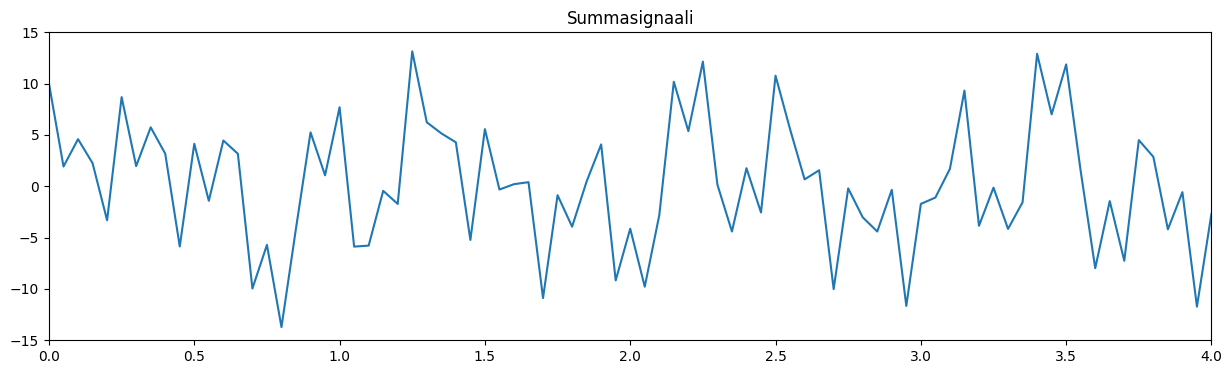

In [109]:
#Tehtävä 12:
# Toista edellisen tehtävän vaiheet, mutta tällä kertaa summataan neljä taaajuutta  
# 4sin(6t), 3sin(15t),  5cos(20t) ja 5cos(50t).
#      Mitä tehospektrille tapahtuu?
#      Miksi?
#      Millä tavalla ongelman voisi korjata (ei tarvitse korjata tässä tehtävässä)?

#Kirjoitetaan koodi lyhennettynä versiona:
dt = 0.05 #jos dt = 0.05s -> taajuus on 20Hz ja Nyqvist taajuus 10Hz
t = np.arange(0,100,dt) #Ajan arvot lähtien nollasta, päättyen sataan, 0.1s välein.
f = 4*np.sin(6*t) + 3*np.sin(15*t) + 5*np.cos(20*t) +5*np.cos(50*t)
#Piirretään summasignaali f kuvaaja
plt.figure(figsize=(15,4))
plt.plot(t,f)
plt.axis([0,4,-15,15])#Zoomataan vähän
plt.title('Summasignaali')
plt.show()

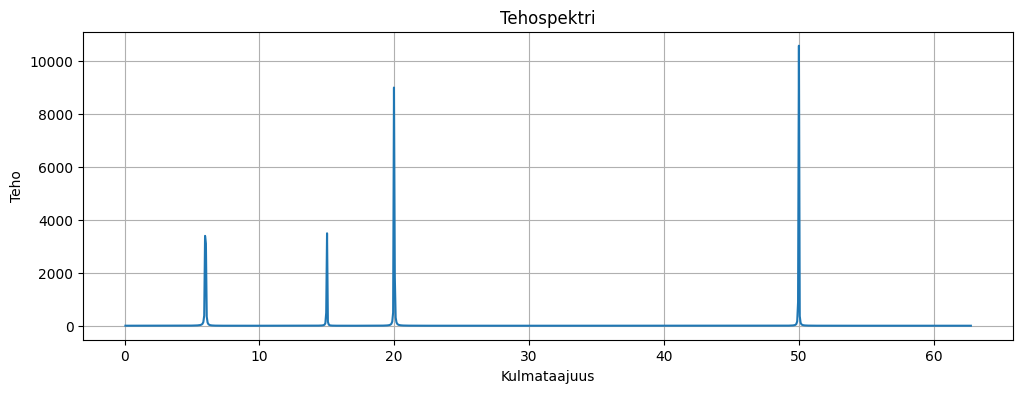

In [110]:
N = len(f) #Datapisteiden määrä
fourier = np.fft.fft(f,N) #Fourier-muunnos, sisältä täydellisen informaation signaalista f
psd = fourier*np.conj(fourier)/N #Power spectral density.
freq = np.fft.fftfreq(N,dt) #Signaalissa mahdollisesti esiityvät taajuudet
L = np.arange(1,np.floor(N/2),dtype = 'int')
PSD = np.array([freq[L],psd[L].real])

plt.figure(figsize=(12,4))
plt.plot(PSD[0,:]*2*np.pi,PSD[1,:]) #Teho taajuuden funktiona
plt.grid()
plt.ylabel('Teho')
plt.xlabel('Kulmataajuus')
plt.title('Tehospektri')
plt.show()

#Tässä tapauksessa näytteistys tapahtui 0.1s välein,
#eli näytteenottotaajuus on 1/0.1s = 10Hz
#Jos signaalin kulmataajuus on 50, niin silloin taajuus on 50/(2*pi) = 8Hz

#Nyqvistin teoreeman mukaan korkein mahdollinen havaittava taajuus on puolet näytteenottotaajuudesta,
#eli tässä tapauksessa 5Hz.
#Jos signaalissa esiintyy suurempia taajuuksia, ne ns. laskostuvat, eli sotkevat tehospektrin. 

#Ratkaisuna joko suodattaminen (poistetaan ne korkeat taajuudet ennen näytteistystä)
#tai näytteenottotaajuuden nostaminen